In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
print('End 1')

End 1


In [6]:
# -----------------------------
# 1. تحميل البيانات + التحويلات
# -----------------------------
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

transform_val_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder("chest_xray/train", transform=transform_train)
val_dataset   = datasets.ImageFolder("chest_xray/val", transform=transform_val_test)
test_dataset  = datasets.ImageFolder("chest_xray/test", transform=transform_val_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=16, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=16, num_workers=2)
print('End 2')

End 2


In [7]:
# -----------------------------
# 2. بناء النموذج (ResNet18)
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)

# تعديل الطبقة الأخيرة لعدد الفئات (2: NORMAL, PNEUMONIA)
model.fc = nn.Linear(model.fc.in_features, 2)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print('End 3')

End 3


In [8]:
# -----------------------------
# 3. تدريب النموذج
# -----------------------------
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    print('start 4')
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        print('start 44')    
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    
    acc = correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Loss: {running_loss/len(train_loader):.4f}, "
          f"Train Acc: {acc:.4f}")
print('end 4')

start 4
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
start 44
st

start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5
start 5

Accuracy: 0.8285256410256411

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.98      0.55      0.71       234
   PNEUMONIA       0.79      0.99      0.88       390

    accuracy                           0.83       624
   macro avg       0.89      0.77      0.79       624
weighted avg       0.86      0.83      0.81       624


Confusion Matrix:
 [[129 105]
 [  2 388]]


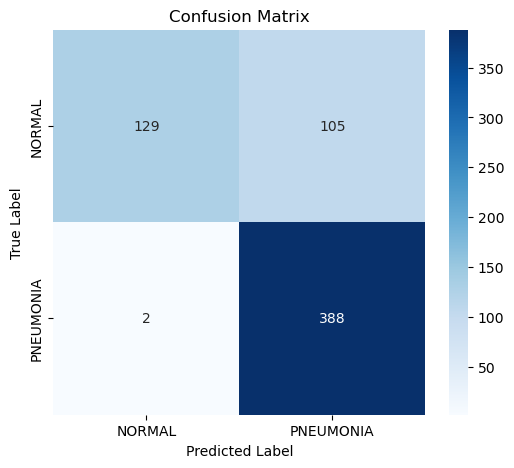

In [9]:
# -----------------------------
# 4. تقييم النموذج
# -----------------------------
model.eval()
all_labels, all_preds = [], []
print('start 5')
with torch.no_grad():
    for images, labels in test_loader:
        print('start 5')
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Accuracy
acc = accuracy_score(all_labels, all_preds)
print("\nAccuracy:", acc)

# Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=['NORMAL','PNEUMONIA']))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['NORMAL','PNEUMONIA'],
            yticklabels=['NORMAL','PNEUMONIA'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()